# Dow Jones Industrial Average (^DJI)

Source
- [Yahoo finance ^DJIA](https://finance.yahoo.com/quote/%5EDJI/history?period1=475804800&period2=1601251200&interval=1d&filter=history&frequency=1d)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dow-Jones-Industrial-Average-(^DJI)" data-toc-modified-id="Dow-Jones-Industrial-Average-(^DJI)-1">Dow Jones Industrial Average (^DJI)</a></span></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2">Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3">Read Data</a></span><ul class="toc-item"><li><span><a href="#Describe-Data" data-toc-modified-id="Describe-Data-3.1">Describe Data</a></span></li><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-3.2">Sample the data</a></span></li><li><span><a href="#Number-the-columns" data-toc-modified-id="Number-the-columns-3.3">Number the columns</a></span></li></ul></li><li><span><a href="#Format-Dates" data-toc-modified-id="Format-Dates-4">Format Dates</a></span></li><li><span><a href="#Rata-Die" data-toc-modified-id="Rata-Die-5">Rata Die</a></span></li><li><span><a href="#Extract-only-the-desired-data" data-toc-modified-id="Extract-only-the-desired-data-6">Extract only the desired data</a></span></li><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-7">Draw Plots</a></span></li><li><span><a href="#Save-DataFrame-to-CSV-file" data-toc-modified-id="Save-DataFrame-to-CSV-file-8">Save DataFrame to CSV file</a></span></li></ul></div>

# Set Up

In [1]:
date_format = "yyyy_mm_dd" # 2007.04.05
show_help = false
include("MarketIndicators.jl") 

# Read Data

In [2]:
#data = available_datasets()
dataset_file_name = available_datasets()[5,2] # [row, column]
println("dataset_file_name: ", dataset_file_name)
df = fetch_dataset(dataset_file_name, date_format)
println("data dimentions: # Read Data", size(df) )
count = size(df)[1]

dataset_file_name: ^DJI.csv
data dimentions: # Read Data(8989, 7)


8989

## Describe Data

In [3]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Date,,1985-01-29,,2020-09-25,8989,,String
2,Open,10163.8,1243.71,10094.4,29440.5,,,Float64
3,High,10226.4,1251.21,10163.4,29568.6,,,Float64
4,Low,10098.9,1235.53,10020.9,29406.8,,,Float64
5,Close,10166.3,1242.05,10094.1,29551.4,,,Float64
6,Adj Close,10166.3,1242.05,10094.1,29551.4,,,Float64
7,Volume,1.45358e8,2530000,1.1142e8,2190810000,,,Int64


## Sample the data

In [4]:
preview_data(df)

21×7 DataFrame
│ Row │ Date       │ Open    │ High    │ Low     │ Close   │ Adj Close │
│     │ String     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64   │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼───────────┤
│ 1   │ 1985-01-29 │ 1277.72 │ 1295.49 │ 1266.89 │ 1292.62 │ 1292.62   │
│ 2   │ 1986-11-07 │ 1885.69 │ 1899.47 │ 1870.78 │ 1886.53 │ 1886.53   │
│ 3   │ 1988-08-18 │ 2029.69 │ 2046.59 │ 2014.22 │ 2027.03 │ 2027.03   │
│ 4   │ 1990-05-30 │ 2882.35 │ 2908.21 │ 2853.89 │ 2878.56 │ 2878.56   │
│ 5   │ 1992-03-09 │ 3221.6  │ 3227.19 │ 3211.31 │ 3215.1  │ 3215.1    │
│ 6   │ 1993-12-15 │ 3742.6  │ 3743.75 │ 3716.92 │ 3716.92 │ 3716.92   │
│ 7   │ 1995-09-26 │ 4770.3  │ 4798.11 │ 4755.12 │ 4765.6  │ 4765.6    │
│ 8   │ 1997-07-07 │ 7896.5  │ 7951.45 │ 7828.18 │ 7858.5  │ 7858.5    │
│ 9   │ 1999-04-19 │ 10493.9 │ 10765.7 │ 10404.9 │ 10440.5 │ 10440.5   │
│ 10  │ 2001-01-26 │ 10727.1 │ 10742.9 │ 10625.0 │ 10660.0 │ 10660.0   │
│ 11  │ 2002-11-12 │ 8356.73 │ 8504.

## Number the columns

In [5]:
# sample the values in the columns
columns = names(df)
for i in 1:length(columns)
    println(i, " ", columns[i])
end

1 Date
2 Open
3 High
4 Low
5 Close
6 Adj Close
7 Volume


# Format Dates

In [6]:
dates = format_dates( df[:,1] , "yy/mdd")
dates[1:5]

5-element Array{String,1}:
 "85/129"
 "85/130"
 "85/131"
 "85/201"
 "85/204"

# Rata Die

In [7]:
insert!(df, 1, zeros(Int64, 8989), :Rata_Die)
update_rata_die!(df, 1, 2)
first(df, 6)

,Rata_Die,Date,Open,High,Low,Close,Adj Close,Volume
,Int64,String,Float64,Float64,Float64,Float64,Float64,Int64
1,31074,1985-01-29,1277.72,1295.49,1266.89,1292.62,1292.62,13560000
2,31075,1985-01-30,1297.37,1305.1,1278.93,1287.88,1287.88,16820000
3,31076,1985-01-31,1283.24,1293.4,1272.64,1286.77,1286.77,14070000
4,31077,1985-02-01,1276.94,1286.11,1269.77,1277.72,1277.72,10980000
5,31080,1985-02-04,1272.08,1294.94,1268.99,1290.08,1290.08,11630000
6,31081,1985-02-05,1294.06,1301.13,1278.6,1285.23,1285.23,13800000


In [8]:
# sample the values in the columns
columns = names(df)
for i in 1:length(columns)
    println(i, " ", columns[i])
end

1 Rata_Die
2 Date
3 Open
4 High
5 Low
6 Close
7 Adj Close
8 Volume


# Draw Plots

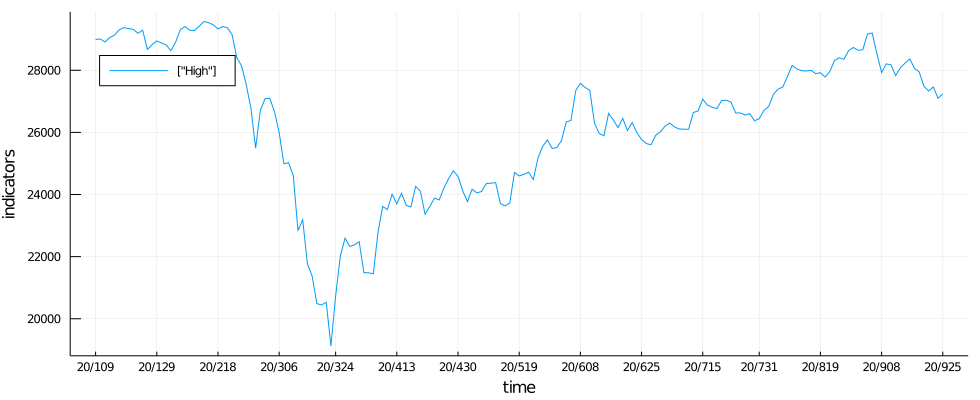

In [9]:
using Plots

rows = count-180:count
gr()
plot(          dates[rows], # x-axis: dates
               [  df[rows,4]    ], # y-axis
    label    = [  columns[4]    ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Extract only the desired data

In [10]:
using DataFrames
df1 = DataFrame( Day = df[:,1], 
                Date = df[:,2],
                High = df[:,4],
                Low  = df[:,5]
               )

first( df1, 6)

,Day,Date,High,Low
,Int64,String,Float64,Float64
1,31074,1985-01-29,1295.49,1266.89
2,31075,1985-01-30,1305.1,1278.93
3,31076,1985-01-31,1293.4,1272.64
4,31077,1985-02-01,1286.11,1269.77
5,31080,1985-02-04,1294.94,1268.99
6,31081,1985-02-05,1301.13,1278.6


[back to top](#Table-of-Contents)
<hr/>

# Save DataFrame to CSV file

In [11]:
save_dataset(df1, dataset_file_name);